In [1]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
import pandas as pd
import os

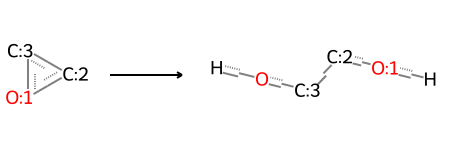

In [2]:
rxn=AllChem.ReactionFromSmarts('[#6;A:2]1[#6;A:3][#8:1]1>>[H][#8:1][#6;A:2][#6;A:3][#8][H]')
rxn

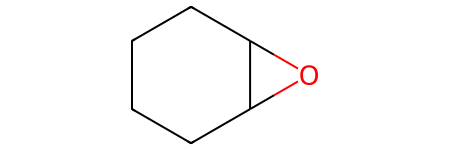

In [3]:
parent=Chem.MolFromSmiles('C1CCC2OC2C1')
parent

In [4]:
products=rxn.RunReactants((parent,))
uniq=set([Chem.MolToSmiles(x[0],isomericSmiles=True) for x in products])
print('Unique Products:', uniq)

type(uniq)
#prod=Chem.MolFromSmiles(uniq)
#Chem.Draw.MolsToGridImage(prod)

Unique Products: {'[H]OC1CCCCC1O[H]'}


set

In [5]:
resulting_mols=[]
for i in range(len(products)):
    current_mol=products[i][0]
    smi=Chem.MolToSmiles(current_mol)
    print(smi)
#   resulting_mols.append(current_mol)
    
#Chem.Draw.MolsToGridImage(resulting_mols)

[H]OC1CCCCC1O[H]
[H]OC1CCCCC1O[H]


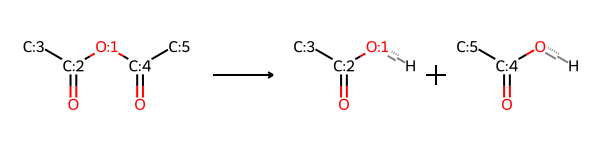

In [6]:
anhydride_rxn=AllChem.ReactionFromSmarts('[#6:3]-[#6:2](=O)-[#8:1]-[#6:4](-[#6:5])=O>>[H][#8:1]-[#6:2](-[#6:3])=O.[H][#8]-[#6:4](-[#6:5])=O')
cyclic_anhydride_rxn=AllChem.ReactionFromSmarts('[#6:3]-[#6:2](=O)-[#8:1]-[#6:4](-[#6:5])=O>>[H][#8:1]-[#6:2](-[#6:3])=O.[H][#8]-[#6:4](-[#6:5])=O')
anhydride_rxn

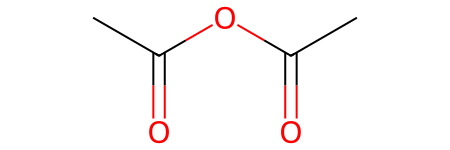

In [7]:
nc_parent=Chem.MolFromSmiles('CC(=O)OC(C)=O')
nc_parent

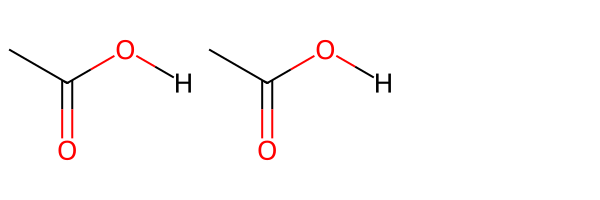

In [8]:
products=anhydride_rxn.RunReactants((nc_parent,))

resulting_mols=[]
for i in range(len(products)):
    current_mol=products[i][0]
    resulting_mols.append(current_mol)
    
Chem.Draw.MolsToGridImage(resulting_mols)
#Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(j) for j in uniq])

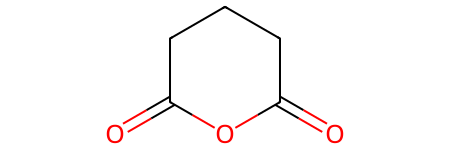

In [9]:
c_parent=Chem.MolFromSmiles('O=C1CCCC(=O)O1')
c_parent

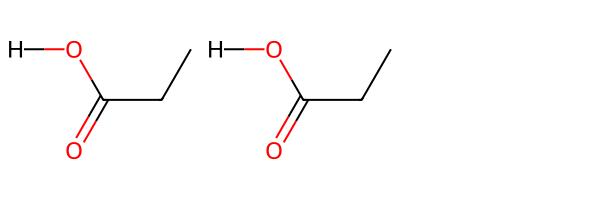

In [10]:
products=cyclic_anhydride_rxn.RunReactants((c_parent,))

resulting_mols=[]
for i in range(len(products)):
    current_mol=products[i][0]
    resulting_mols.append(current_mol)
    
Chem.Draw.MolsToGridImage(resulting_mols)

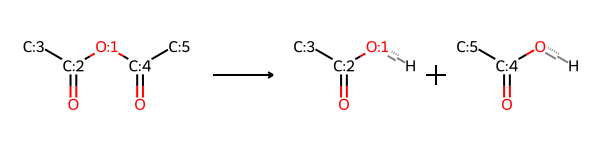

In [11]:
cyclic_anhydride_rxn

In [12]:
ring=c_parent.GetRingInfo()
ring.AtomRings()

((1, 7, 5, 4, 3, 2),)

In [13]:
notRing=nc_parent.GetRingInfo()
notRing.AtomRings()

()

In [14]:
cyclic_anhydride_rxn=AllChem.ReactionFromSmarts('O=[#6:2]-1-[#6:3]-[#6]-[#6:5]-[#6:4](=O)-[#8:1]-1>>[H][#8:1]-[#6:2](-[#6:3])=O.[H][#8]-[#6:4](-[#6:5])=O')

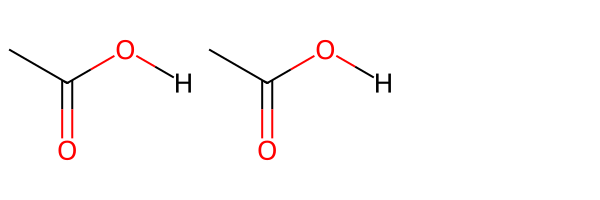

In [15]:
products=cyclic_anhydride_rxn.RunReactants((c_parent,))

resulting_mols=[]
for i in range(len(products)):
    current_mol=products[i][0]
    resulting_mols.append(current_mol)
    
Chem.Draw.MolsToGridImage(resulting_mols)

In [16]:
c_parent.GetAtomWithIdx(1).IsInRing()

True

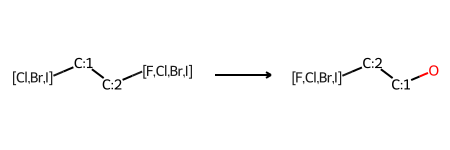

In [17]:
#test a reaction that has rules without any additional modifications
rule_rxn=AllChem.ReactionFromSmarts('[#17,#35,#53:4]-[#6;X4:1]-[#6:2]-[F,Cl,Br,I:3]>>[#8]-[#6;X4:1]-[#6:2]-[F,Cl,Br,I:3]')
rule_rxn

[11:19:18] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 4 


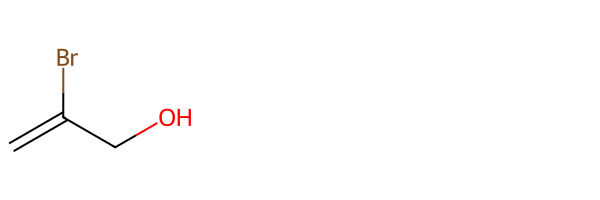

In [18]:
test=Chem.MolFromSmiles('ClCC(Br)=C')

products=rule_rxn.RunReactants((test,))

resulting_mols=[]
for i in range(len(products)):
    current_mol=products[i][0]
    resulting_mols.append(current_mol)
    
Chem.Draw.MolsToGridImage(resulting_mols)

works as expected

## Run full Library

In [19]:
#lib=Chem.SDMolSupplier('./Hydrolysis_v1.8_wSpRxn.sdf')
#lib=Chem.rdChemReactions.EnumerateLibrary(
lib=pd.read_excel(r'C:\Users\LSHIELDS\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\MyResearch\CTS_doc\CTS_modernization\Hydrolysis_examples.xlsx')
ex=list(lib['Parent'].dropna())
#examples=list(lib.loc[lib['ID']==1,'Parent'])


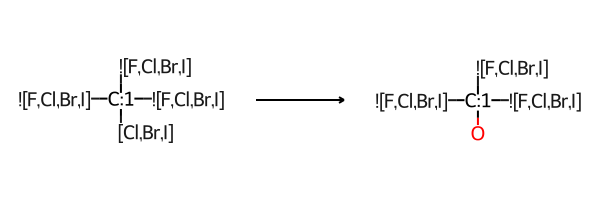

[13:27:02] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 5 


NameError: name 'p' is not defined

In [21]:
path = r'C:\Users\LSHIELDS\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\MyResearch\CTS_doc\CTS_modernization\rxnFiles'

os.chdir(path) #change directory to hydrolysis rxnfiles
os.getcwd() #check that I am in the correct directory

for file in os.listdir(path):
    rxn=AllChem.ReactionFromRxnFile(file)
    display(Draw.ReactionToImage(rxn))
    for x in ex:
        parent=Chem.MolFromSmiles(x)
        #library=AllChem.EnumerateLibrary(rxn,parent)
        products=rxn.RunReactants((parent,))

        resulting_mols=[]
        for i in range(len(products)):
            current_mol=products[i][0]
            p=Chem.MolToSmiles(current_mol)
            resulting_mol.appned(p)

            match=
        print('Parent: ',x,'\n','Products: ',p)
        
        #print(products)

    #print(type(rxn))
   

In [ ]:
test_rxn=AllChem.ReactionFromSmarts('[#17,#35,#53:4]-[#6;X4:1]-[#6:2]-[F,Cl,Br,I:3]>>[#8]-[#6;X4:1]-[#6:2]-[F,Cl,Br,I:3]')
test_rxn
parent=Chem.MolFromSmiles('ClCC(Br)=C')
#display(Draw.MolsToGridImage(parent))

library=AllChem.EnumerateLibraryFromReaction(test_rxn,parent)


In [ ]:
library

In [ ]:
cyclic anhydride 
[CH3:3][C:2](=O)[O:1][C:4]([CH3:5])=O>>[H][O:1][C:2]([CH3:3])=O.[H]O[C:4]([CH3:5])=O
[CH3:3][C:2](=O)[O:1][C:4]([CH3:5])=O>>[H][O:1][C:2]([CH3:3])=O.[H]O[C:4]([CH3:5])=O
anhydride
